## <b>Implementing Real-time, Scalable and a Robust Credit Card Fraud Detection System</b>

<center>
    <img src="https://miro.medium.com/max/800/1*MZ0Qqk7xtHdvJJbUTu_1CQ.jpeg" alt="Credit Card Fraud Detection" width="50%">
</center>

### Problem Statement :

Credit Card Frauds are the cases of using someone else's credit cards for financial transactions without the information of the card owner. Credit Cards were made available inorder for the people to increase their buying power, it is an agreement with your bank that lets the user use the money lended by the bank in exchange for the repayment of this lended money on the due date or incur interest charges. With the rise in the e-commerce and the recent boom of OTT platforms during the Coronavirus Pandemic, use of credit cards has risen exponentially along with other payment processes. As all the things in the nature are binary, cases of credit card frauds has also achieved high numbers. Global economy pays the price of more than \\$ 24 billion per year due to these frauds. Thus, it becomes essential to solve this problem and as a result a lot of startups have been born into this \\$ 30 billion industry. Thus, building automated models for such a rising problem statement is necessary and AI - ML is the key for it!     

### Aim :
- To classify whether a credit card transaction is fradulent or genuine and handle unbalanced dataset.
- It is a **binary classification** problem with highly unbalanced data.

- **Background:**
Credit card fraud, a most of the time happening issue in the digital age, involves 
unauthorized use of credit cards for financial gain. As e-commerce and digital payments continue to 
proliferate, so too do the opportunities for fraudulent activities. This problem not only impacts 
individuals but also poses substantial risks to financial institutions and the global economy. 

- **Objective:**
The primary objective of this project is to develop a robust machine learning model that 
can accurately classify credit card transactions as fraudulent or genuine. This model will serve as a 
valuable tool for financial institutions to detect and prevent fraudulent activities, thereby 
safeguarding their assets and protecting their customers.

### <center>Dataset Attributes</center>
    
- **V1 - V28** : Numerical features that are a result of PCA transformation.

- **Time** : Seconds elapsed between each transaction and the 1st transaction.

- **Amount** : Transaction amount.

- **Class** : Fraud or otherwise (1 or 0)

# <center><div style="font-family: Trebuchet MS; background-color: #222222; color: #FFFFFF; padding: 12px; line-height: 1;">Dataset Information</div></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv(r"C:\Users\Shravan\OneDrive\Documents\cp2\creditcard.csv")
data1.shape

(284807, 31)

In [3]:
data1.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data1.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
data1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data1[['Time', 'Amount', 'Class']].describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.859575,47488.145955,0.0,54201.5,84692.0,139320.500,172792.00
Amount,284807.0,88.349619,250.120109,0.0,5.6,22.0,77.165,25691.16
Class,284807.0,0.001727,0.041527,0.0,0.0,0.0,0.000,1.00


In [8]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
data1['Class'].nunique()

2

In [14]:
data1['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

- **In class column, there are only 2 categories like class 1 and class 0.**

In [15]:
Fraud_Cases = data1[data1.Class == 1]

In [16]:
print("Fraud Cases are :")
Fraud_Cases.Amount.describe()

Fraud Cases are :


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
No_Fraud_Cases = data1[data1.Class == 0]

In [18]:
print("No Fraud Cases are :")
No_Fraud_Cases.Amount.describe()

No Fraud Cases are :


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

###### Described fraud and no_fraud classes and plotting them in heatmap with their mean values

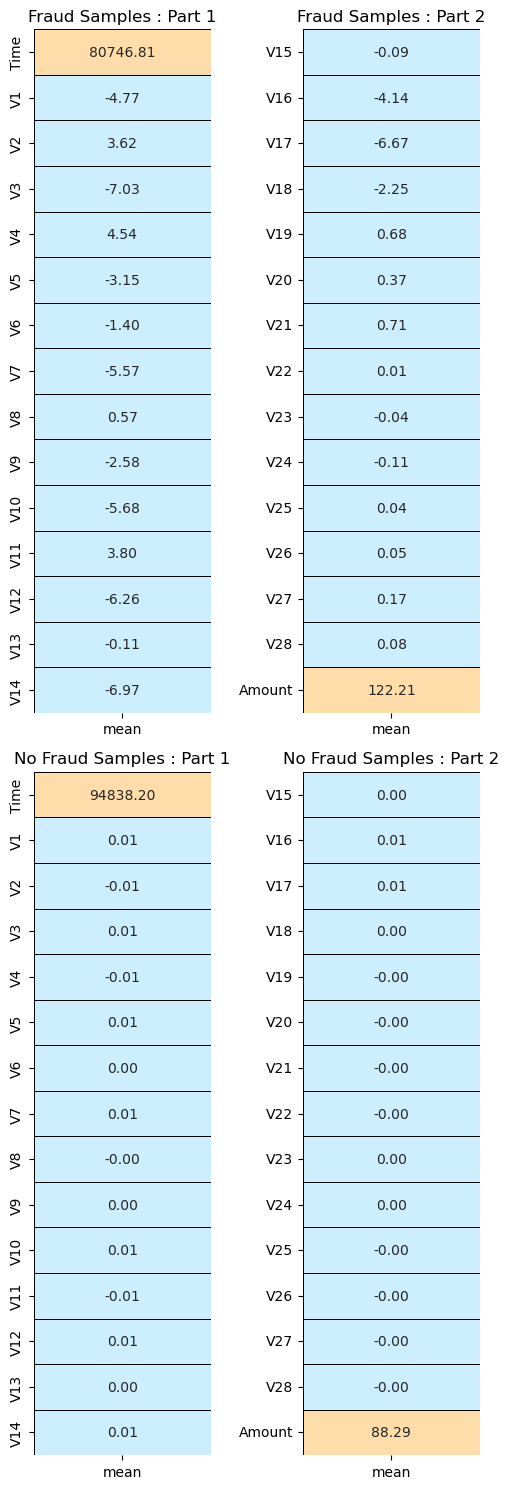

In [19]:
Fraud = data1[data1['Class'] == 1].describe().T
No_fraud = data1[data1['Class'] == 0].describe().T

colors = ['#CCEEFF','#FFDDAA']

fig,ax = plt.subplots(nrows = 2, ncols = 2, figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(Fraud[['mean']][:15], annot = True, cmap = colors, linewidths = 0.5, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(Fraud[['mean']][15:30], annot = True, cmap = colors, linewidths = 0.5, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('Fraud Samples : Part 2');


plt.subplot(2,2,3)
sns.heatmap(No_fraud[['mean']][:15], annot = True, cmap = colors, linewidths = 0.5, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(No_fraud[['mean']][15:30], annot = True, cmap = colors, linewidths = 0.5, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('No Fraud Samples : Part 2');


fig.tight_layout(w_pad = 2)

- **Mean** values of features for **Fraud** & **No Fraud** cases!
- For **No Fraud** cases, **V1 - V28** mean values are almost **0** for all the cases. Mean **Amount**, 88.29, is less than the mean transaction amount, 122.21, of the **Fraud** cases.
- **Time** taken for **No Fraud** transactions is more than those for **Fraud** transactions.
- These could be some of the indicators for detecting **fraud** transactions.

# <center><div style="font-family: Trebuchet MS; background-color: #222222; color: #FFFFFF; padding: 12px; line-height: 1;">Data Visualization</div></center>

## Target Variable Visualization (Class) :

###### Percentage of fraud and no_fraud in pie chart

([<matplotlib.patches.Wedge at 0x1d3d7d657f0>,
 [Text(-0.005969650178434203, -1.09998380137016, 'Fraud'),
  Text(0.005969567707642693, 1.0999838018177286, 'No Fraud')],
 [Text(-0.003256172824600474, -0.5999911643837235, '99.8%'),
  Text(0.003256127840532378, 0.5999911646278518, '0.2%')])

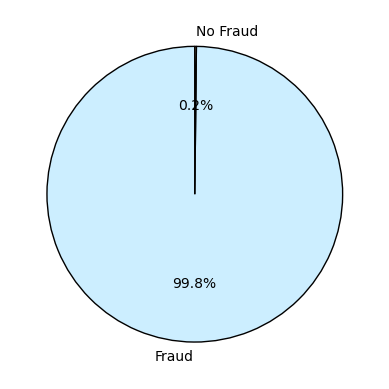

In [20]:
Fraud = len(data1[data1['Class'] == 1]) / len(data1) * 100
No_fraud = len(data1[data1['Class'] == 0]) / len(data1) * 100
Fraud_percentage = [No_fraud, Fraud]

plt.pie(Fraud_percentage, labels = ['Fraud','No Fraud'], autopct='%1.1f%%', startangle = 90, colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

###### Count of fraud and no_fraud classes in numbers using countplot

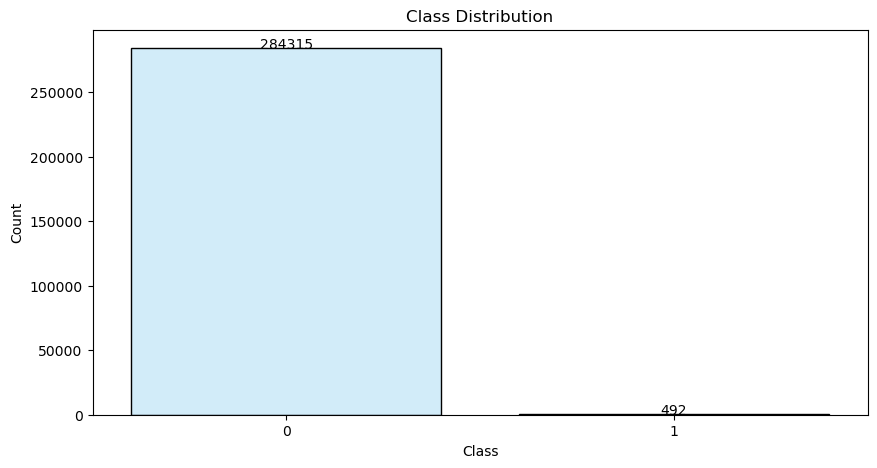

In [21]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Class', data=data1, edgecolor='black', palette=colors)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

- The data is clearly **highly unbalanced** with majority of the transactions being **No Fraud**. 
- Due to highly unbalanced data, the classification model will bias its prediction towards the majority class, **No Fraud**. 
- Hence, data balancing becomes a crucial part in building a robust model. 

# <center><div style="font-family: Trebuchet MS; background-color: #222222; color: #FFFFFF; padding: 12px; line-height: 1;">Feature Selection</div></center>

## Correlation Matrix :

###### Correlation of all features with each other

<Axes: >

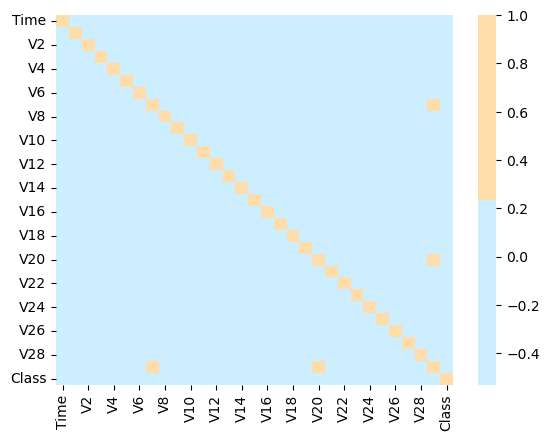

In [22]:
sns.heatmap(data1.corr(), cmap = colors, cbar = True)

- There are too many features in the dataset and it is difficult to understand correlation between them.
- Hence, we will plot the correlation map only with the target variable.

###### Correlation of all features using subplots by their values in order.

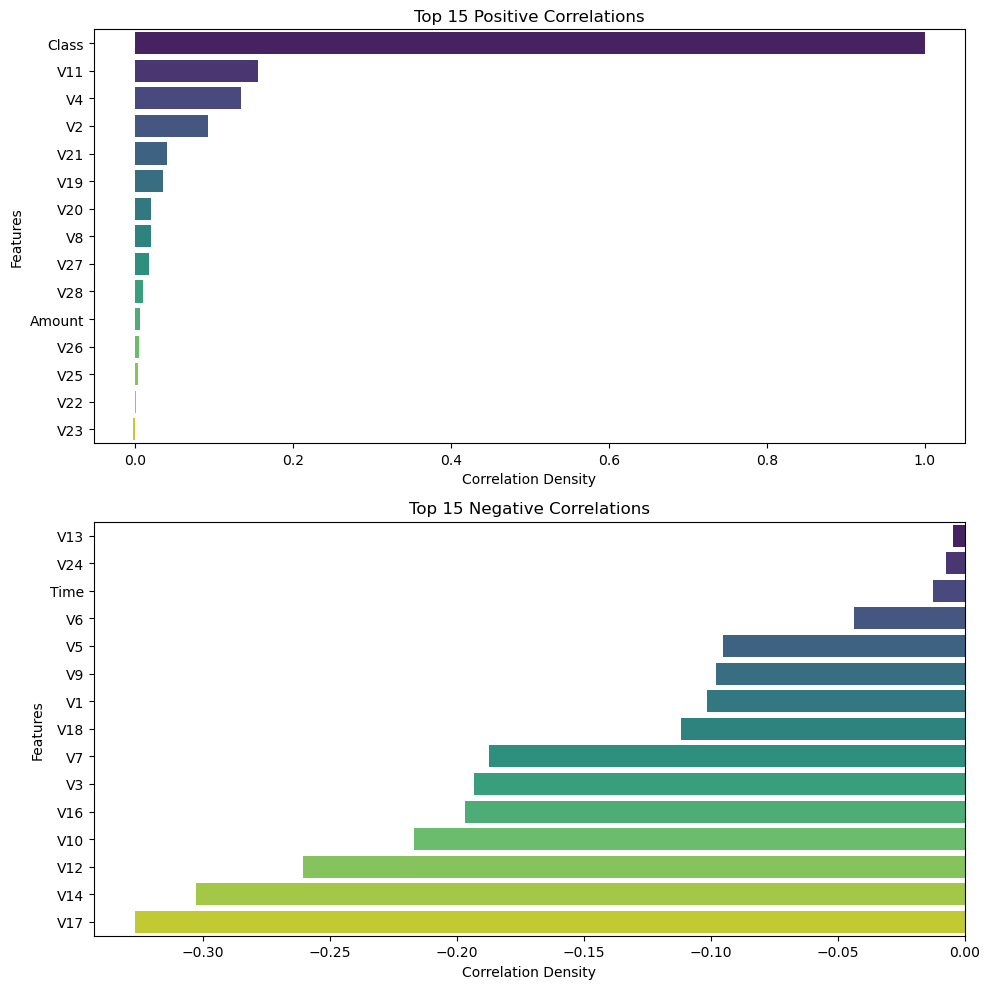

In [23]:
corr = data1.corrwith(data1['Class']).sort_values(ascending=False)

# Created two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plotted top 15 positive correlations
sns.barplot(x=corr.head(15), y=corr.head(15).index, palette='viridis', ax=ax[0])
ax[0].set_xlabel('Correlation Density')
ax[0].set_ylabel('Features')
ax[0].set_title('Top 15 Positive Correlations')

# Plotted top 15 negative correlations
sns.barplot(x=corr.tail(15), y=corr.tail(15).index, palette='viridis', ax=ax[1])
ax[1].set_xlabel('Correlation Density')
ax[1].set_ylabel('Features')
ax[1].set_title('Top 15 Negative Correlations')

plt.tight_layout()
plt.show()

- For feature selection, we will **exclude** the features having correlation values between **[-0.1,0.1]**.
- V4, V11 are positively correlated and V7, V3, V16, V10, V12, V14, V17 are negatively correlated with the **Class** feature.

## ANOVA Test : For feature selection

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

###### This code performs feature selection using ANOVA F-value to identify the most relevant features for classification tasks. It calculates F-values, ranks features based on their scores, and visualizes the results using heatmaps. This helps us focus on the most informative features for building a classification model.

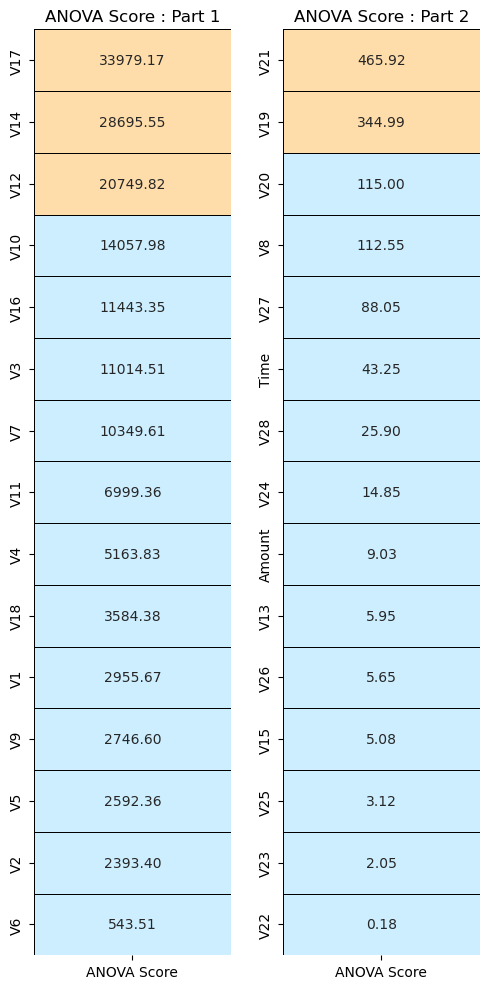

In [25]:
Features = data1.loc[:, :'Amount']
Target = data1.loc[:, 'Class']

Best_Features = SelectKBest(score_func = f_classif, k = 'all')
fit = Best_Features.fit(Features, Target)

Feature_Scores = pd.DataFrame(data = fit.scores_, index = list(Features.columns), columns = ['ANOVA Score']) 
Feature_Scores = Feature_Scores.sort_values(ascending = False, by = 'ANOVA Score')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(Feature_Scores.iloc[:15,:], annot = True, cmap = colors, linewidths = 0.4, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(Feature_Scores.iloc[15:30], annot = True, cmap = colors, linewidths = 0.4, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

- Higher the value of the ANOVA score, higher the importance of that feature with the target variable.
- From the above plot, we will reject features with values less than 50.
- In this case, we will create 2 models based on features selected from the **Correlation Plot** & **ANOVA Score**.

#### *Dataset for Model based on Correlation Plot :*

In [26]:
df1 = data1[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


#### *Dataset for Model based on ANOVA Score :*

In [27]:
df2 = data1.copy(deep = True)
df2.drop(columns = list(Feature_Scores.index[20:]), inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0


# <center><div style="font-family: Trebuchet MS; background-color: #222222; color: #FFFFFF; padding: 12px; line-height: 1;">Data Balancing</div></center>

- In order to cope with unbalanced data, there are 2 options :

    - **Undersampling** : Trim down the majority samples of the target variable.
    - **Oversampling** : Increase the minority samples of the target variable to the majority samples.
    
    
- For best performances, we will use the combination of undersampling and oversampling.
- First, we will undersample the majority samples and it is followed by oversampling minority samples.
- For data balancing, we will use **imblearn**.
- **PIP statement** : pip install imbalanced-learn

In [28]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#### *Data Balancing for Model based on Correlation Plot :*

In [29]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.iloc[:,:9].values
t1 = df1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps = steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 4920, 1: 2460})

### *Data Balancing for Model based on ANOVA Score :*

In [30]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)

f2 = df2.iloc[:,:20].values
t2 = df2.iloc[:,20].values

steps = [('under', under), ('over', over)]
pipeline = Pipeline(steps = steps)
f2, t2 = pipeline.fit_resample(f2, t2)

Counter(t2)

Counter({0: 4920, 1: 2460})

### Calculation for Data Balancing :

- **Sampling Strategy** : It is a ratio which is the common paramter for oversampling and undersampling.
- **Sampling Strategy** : **( Samples of Minority Class ) / ( Samples of Majority Class )**


- In this case,

    - **Majority Class : No Fraud Cases** : 284315 samples
    - **Minority Class : Fraud Cases** : 492 samples


### Undersampling : Trim down the majority class samples

- Sampling_Strategy = 0.1
- 0.1 = ( 492 ) / Majority Class Samples
- After undersampling, 

    - **Majority Class : No Fraud Cases** : 4920 samples
    - **Minority Class : Fraud Cases** : 492 samples


### Oversampling : Increase the minority class samples

- Sampling_Strategy = 0.5
- 0.5 = ( Minority Class Samples ) / 4920
- After oversampling, 

    - **Majority Class : No Fraud Cases** : 4920 samples
    - **Minority Class : Fraud Cases** : 2460 samples
    

- Final Class Samples :

    - **Majority Class : No Fraud Cases** : 4920 samples
    - **Minority Class : Fraud Cases** : 2460 samples


- For imbalanced datasets, we **duplicate the data** to deal with the potential bias in the predictions. 
- Due to this duplication process, we are using **synthetic data** for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.
- Thus, evaluating models using **accuracy** will be misleading. Instead, we will go for **confusion matrix, ROC-AUC graph and ROC-AUC score** for model evaluation.

# <center><div style="font-family: Trebuchet MS; background-color: #222222; color: #FFFFFF; padding: 12px; line-height: 1;">Modeling</div></center>

In [31]:
import sklearn
print(sklearn.__version__)

1.6.0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [33]:
RocCurveDisplay.from_estimator

<bound method RocCurveDisplay.from_estimator of <class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>>

In [34]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 50)

x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 50)

- Splitting the data into **80 - 20 train - test** groups.

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [54]:
def model(classifier, x_train, y_train, x_test, y_test, cv=10):
    """Trains a classifier, performs cross-validation, and displays ROC curve."""

    # Train the classifier
    classifier.fit(x_train, y_train)

    # Cross-validation
    cv_scores = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc')
    cv_score_mean = cv_scores.mean()

    # Make predictions on test data
    prediction = classifier.predict(x_test)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, prediction)

    print("Cross Validation Score (ROC AUC):", '{0:.2%}'.format(cv_score_mean))
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc))

    # Create and display ROC curve (using from_estimator method)
    display = RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    display.plot(color='blue', linewidth=2)  # Customize the plot (optional)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier, x_test, y_test):
    """Calculates and displays confusion matrix and classification report."""

    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')

    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))

### 1] Logistic Regression :

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
classifier_lr = LogisticRegression(random_state = 0, C = 10, penalty = 'l2')

#### *Model based on Correlation Plot :*

Cross Validation Score (ROC AUC): 98.26%
ROC_AUC Score: 95.18%


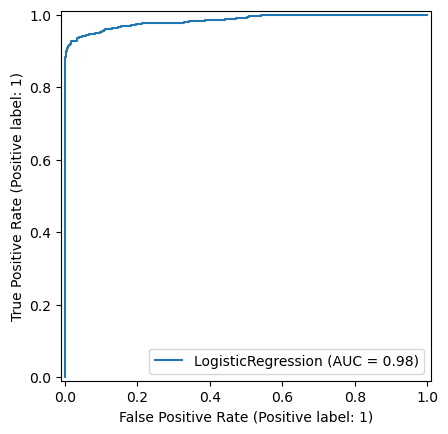

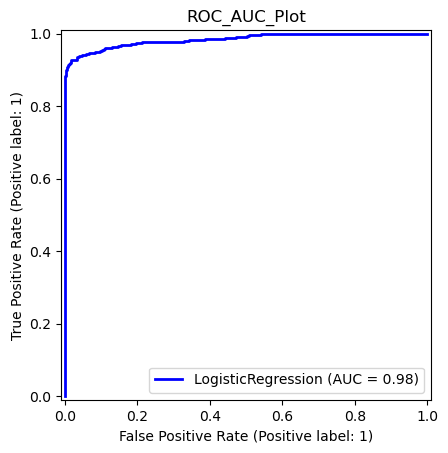

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       971
           1       0.99      0.91      0.95       505

    accuracy                           0.96      1476
   macro avg       0.97      0.95      0.96      1476
weighted avg       0.97      0.96      0.96      1476



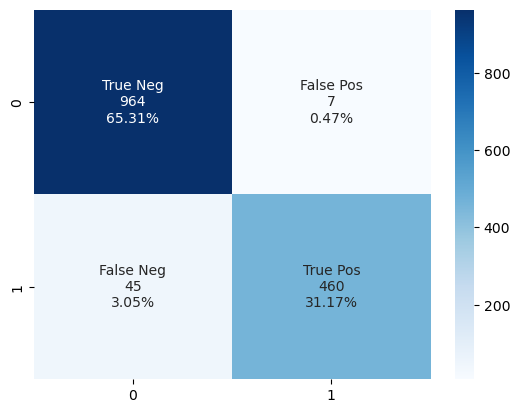

In [55]:
model(classifier_lr, x_train1, y_train1, x_test1, y_test1)
model_evaluation(classifier_lr, x_test1, y_test1)

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

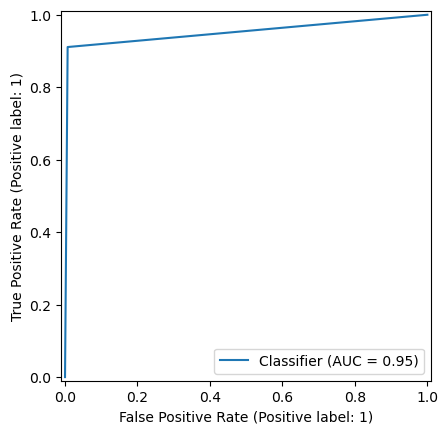

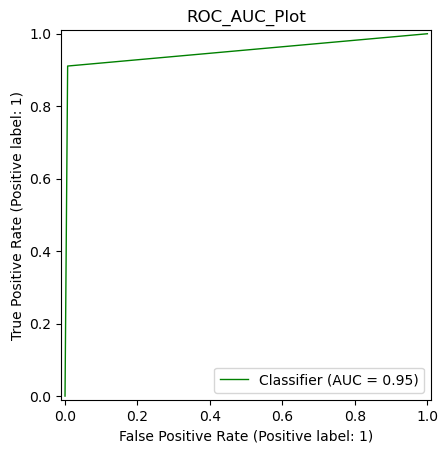

In [57]:
# Assuming I have classifier_lr, x_test1, and y_test1

# Calculate predictions from your classifier
prediction = classifier_lr.predict(x_test1)

# Create the RocCurveDisplay object
display = RocCurveDisplay.from_predictions(y_test1, prediction)

display.plot(color='green', linewidth=1)
plt.title('ROC_AUC_Plot')
plt.show()

#### *Model based on ANOVA Score :*

Cross Validation Score (ROC AUC): 98.59%
ROC_AUC Score: 94.04%


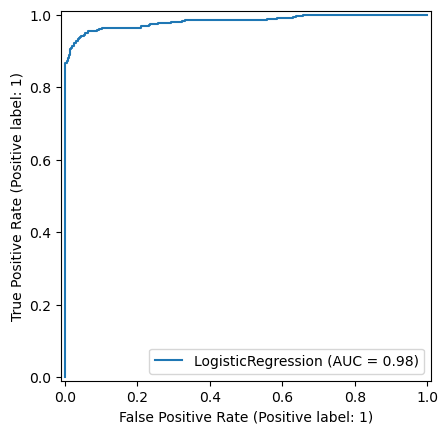

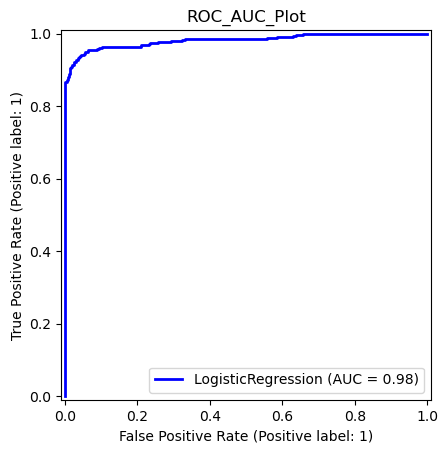

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       971
           1       0.97      0.89      0.93       505

    accuracy                           0.96      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.96      0.96      0.95      1476



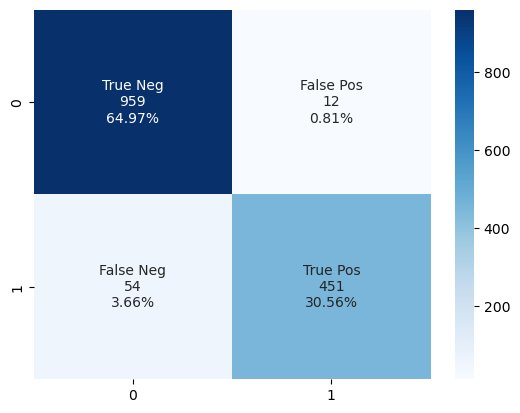

In [58]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

### 2] Support Vector Classifier :

In [59]:
from sklearn.svm import SVC

In [60]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

#### *Model based on Correlation Plot :*

Cross Validation Score (ROC AUC): 98.13%
ROC_AUC Score: 94.50%


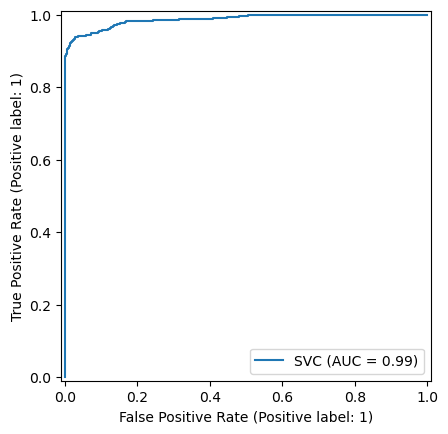

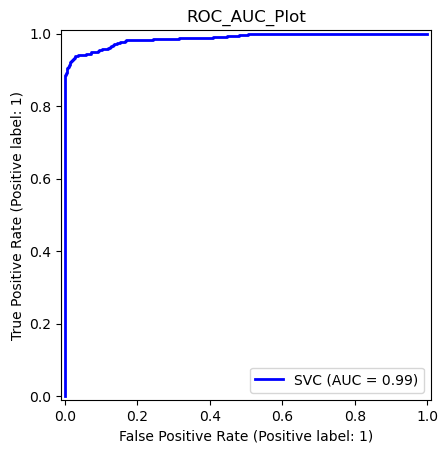

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       971
           1       0.99      0.90      0.94       505

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.96      1476
weighted avg       0.96      0.96      0.96      1476



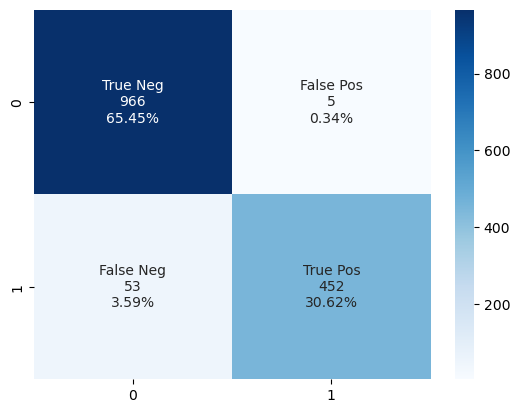

In [61]:
model(classifier_svc, x_train1, y_train1, x_test1, y_test1)
model_evaluation(classifier_svc, x_test1, y_test1)

#### *Model based on ANOVA Score :*

Cross Validation Score (ROC AUC): 98.43%
ROC_AUC Score: 93.65%


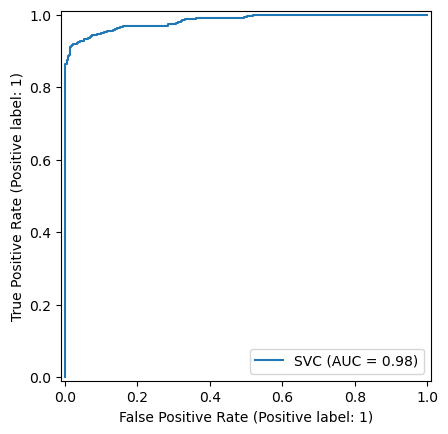

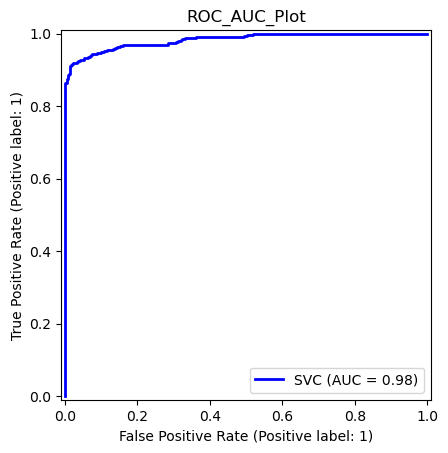

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       971
           1       0.98      0.88      0.93       505

    accuracy                           0.95      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.96      0.95      0.95      1476



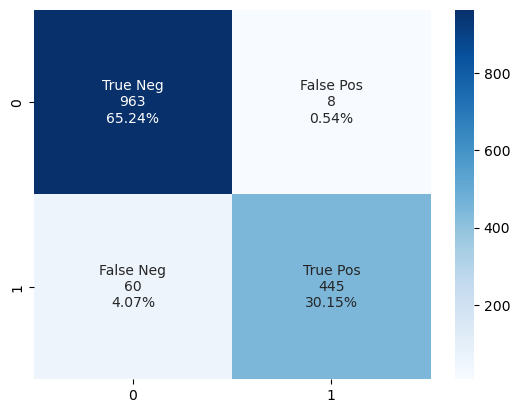

In [62]:
model(classifier_svc, x_train2, y_train2, x_test2, y_test2)
model_evaluation(classifier_svc, x_test2, y_test2)

### 3] Decision Tree Classifier :

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
classifier_dt = DecisionTreeClassifier(random_state = 1000, max_depth = 4, min_samples_leaf = 1)

#### *Model based on Correlation Plot :*

Cross Validation Score (ROC AUC): 97.35%
ROC_AUC Score: 94.05%


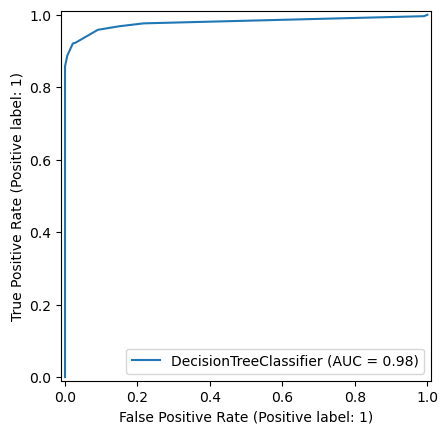

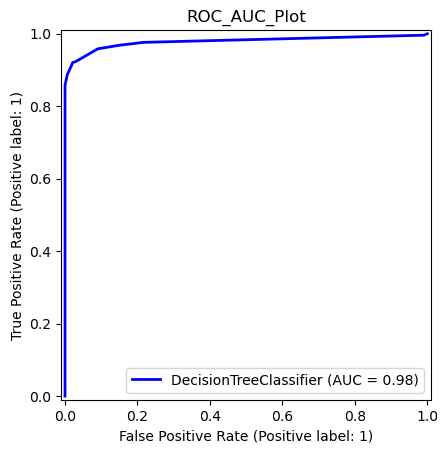

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       971
           1       0.99      0.89      0.93       505

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476



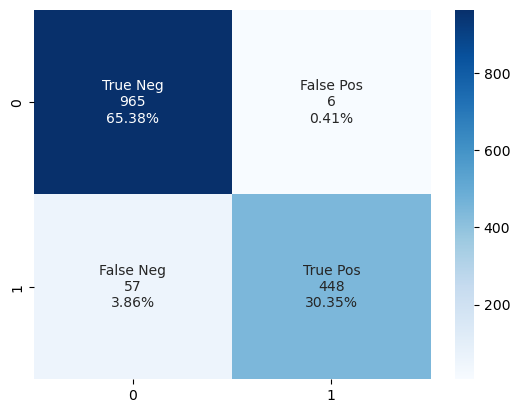

In [65]:
model(classifier_dt, x_train1, y_train1, x_test1, y_test1)
model_evaluation(classifier_dt, x_test1, y_test1)

#### *Model based on ANOVA Score :*

Cross Validation Score (ROC AUC): 96.75%
ROC_AUC Score: 92.66%


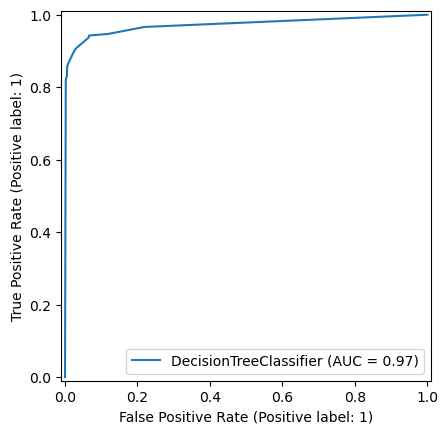

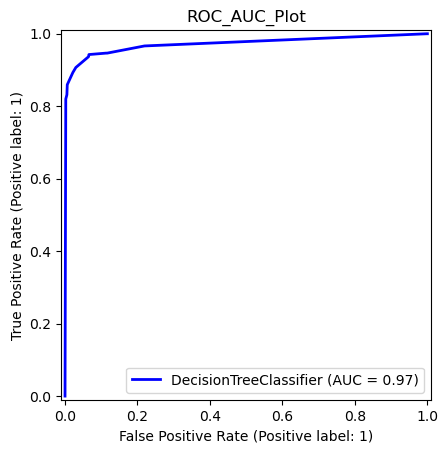

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       971
           1       0.99      0.86      0.92       505

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



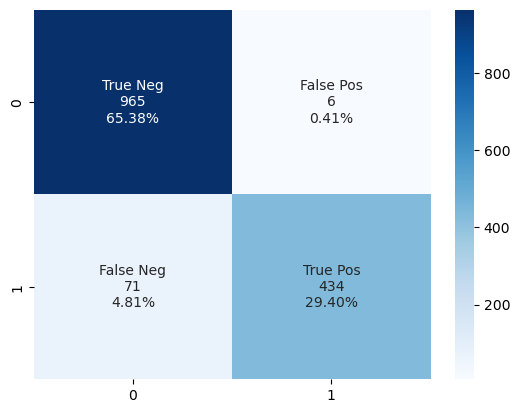

In [66]:
model(classifier_dt, x_train2, y_train2, x_test2, y_test2)
model_evaluation(classifier_dt, x_test2, y_test2)

### 4] Random Forest Classifier : 

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

#### *Model based on Correlation Plot :*

Cross Validation Score (ROC AUC): 98.14%
ROC_AUC Score: 94.45%


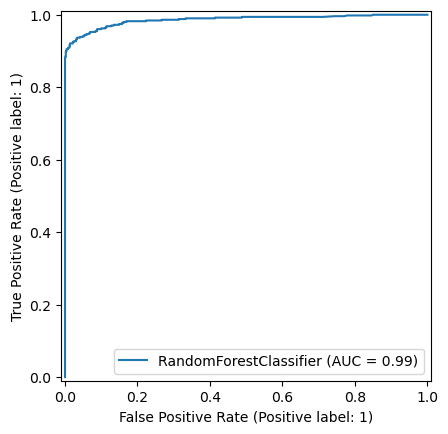

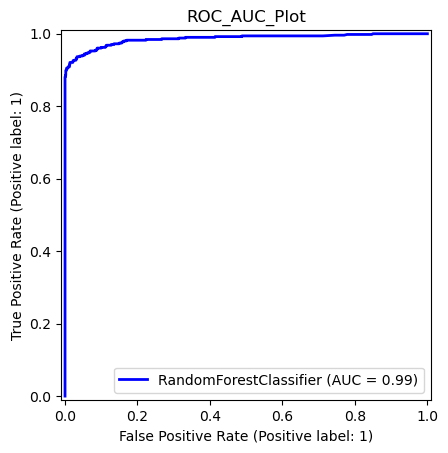

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       971
           1       1.00      0.89      0.94       505

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.96      1476
weighted avg       0.96      0.96      0.96      1476



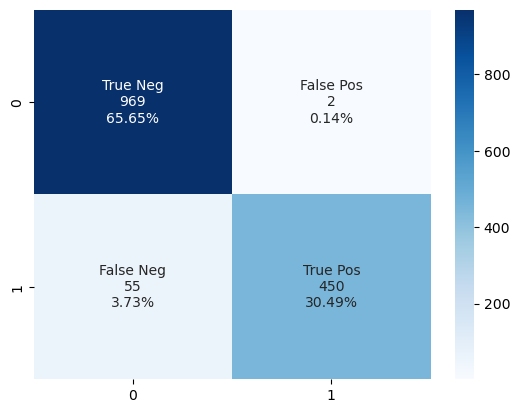

In [69]:
model(classifier_rf, x_train1, y_train1, x_test1, y_test1)
model_evaluation(classifier_rf, x_test1, y_test1)

#### *Model based on ANOVA Score :*

Cross Validation Score (ROC AUC): 98.27%
ROC_AUC Score: 92.97%


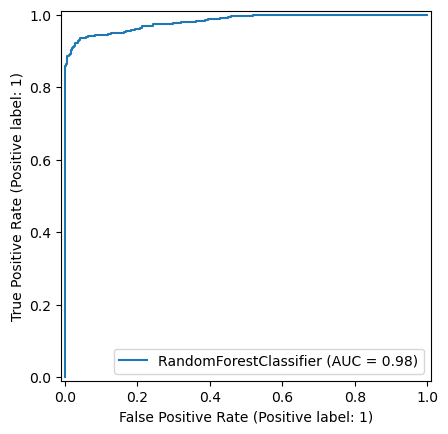

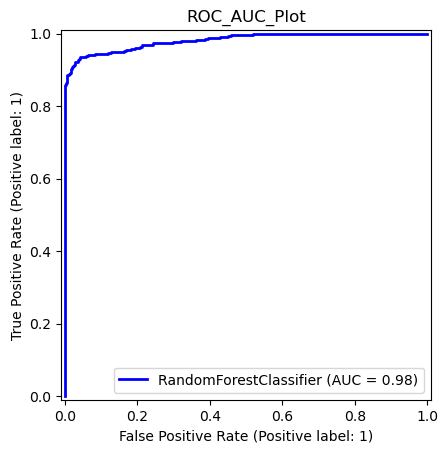

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       971
           1       1.00      0.86      0.92       505

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



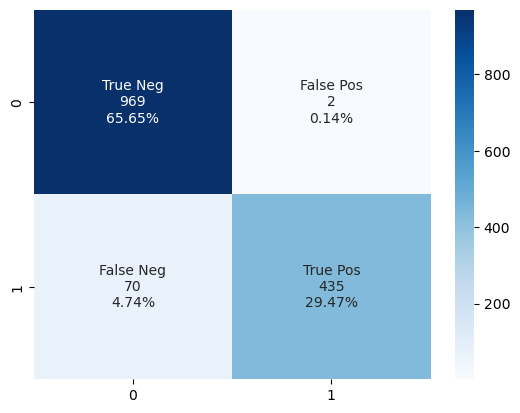

In [70]:
model(classifier_rf, x_train2, y_train2, x_test2, y_test2)
model_evaluation(classifier_rf, x_test2, y_test2)

## 5] K-Nearest Neighbors :

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

### *Model based on Correlation Plot :*

Cross Validation Score (ROC AUC): 99.35%
ROC_AUC Score: 97.94%


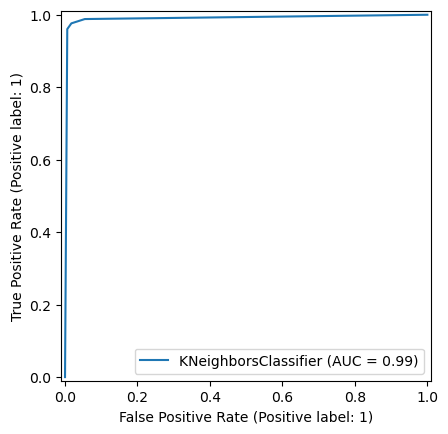

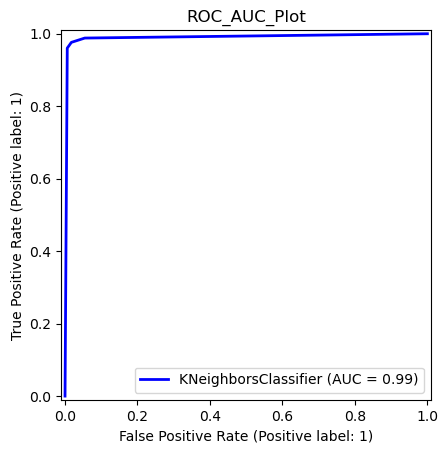

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       971
           1       0.97      0.98      0.97       505

    accuracy                           0.98      1476
   macro avg       0.98      0.98      0.98      1476
weighted avg       0.98      0.98      0.98      1476



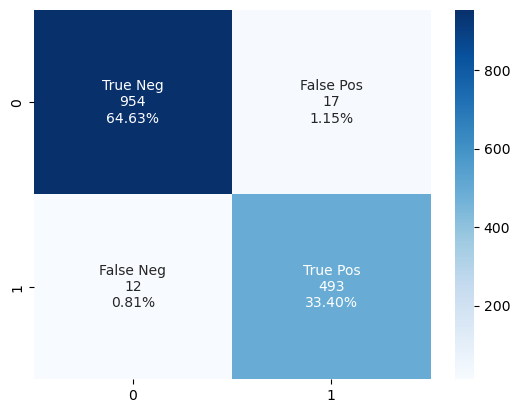

In [73]:
model(classifier_knn, x_train1, y_train1,x_test1, y_test1)
model_evaluation(classifier_knn, x_test1, y_test1)

### *Model based on ANOVA Score :*

Cross Validation Score (ROC AUC): 99.40%
ROC_AUC Score: 98.13%


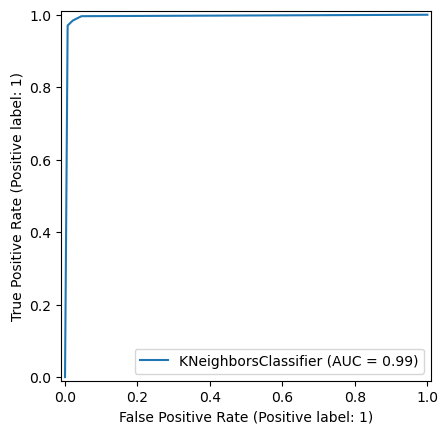

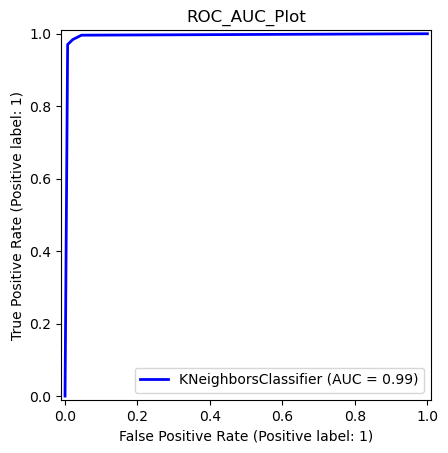

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       971
           1       0.96      0.98      0.97       505

    accuracy                           0.98      1476
   macro avg       0.98      0.98      0.98      1476
weighted avg       0.98      0.98      0.98      1476



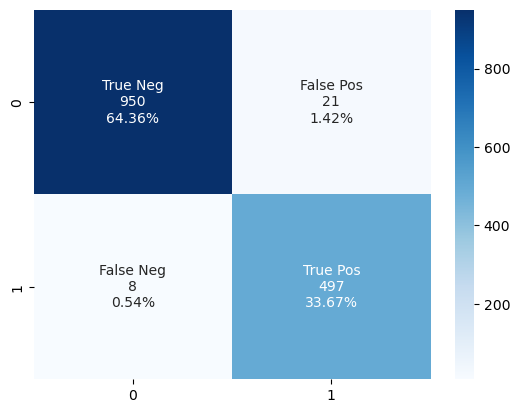

In [74]:
model(classifier_knn, x_train2, y_train2, x_test2, y_test2)
model_evaluation(classifier_knn, x_test2, y_test2)

### ML Alogrithm Results Table :

#### Results Table for models based on Correlation Plot : 

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Fraud)|
|-|-|-|-|-|
|1|Logistic Regression|98.01%|92.35%|91%|
|2|Support Vector Classifier|97.94%|92.10%|91%|
|3|Decision Tree Classifier|96.67%|91.36%|90%|
|4|Random Forest Classifier|97.84%|91.71%|91%|
|5|K-Nearest Neighbors|99.34%|97.63%|97%|
 
#### Results Table for models based on ANOVA Score :

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Fraud)|
|-|-|-|-|-|
|1|Logistic Regression|98.45%|94.69%|94%|
|2|Support Vector Classifier|98.32%|94.40%|94%|
|3|Decision Tree Classifier|97.13%|93.69%|93%|
|4|Random Forest Classifier|98.20%|94.06%|94%|
|5|K-Nearest Neighbors|99.54%|98.47%|97%|

# <center><div style="font-family: Trebuchet MS; background-color: #222222; color: #FFFFFF; padding: 12px; line-height: 1;">Conclusion</div></center>

- As the features are disguised, feature selection cannot be assisted based on the domain knowledge of the topic. Statistical tests hold the complete importance to select features for modeling.  


- Due to the use of SMOTE analysis for balancing the data, the models trained on this data cannot be evaluated using accuracy. Hence, we resort to Cross Validation Score and ROC-AUC Score for model evaluation.